In [1]:
#Import libraries
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

#We can now use this folder and import our modules
sys.path.insert(0, "/home/apprenant/Documents/simplon_dev/pyhon_sql/zillow_price")

from src.utils.functions import *

# Pandas configurations 
sns.set()
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


#Import data
print('Loading data...')

train_2016 = pd.read_csv('../Data/raw_data/train_2016_v2.csv', low_memory=False)
properties_2016 = pd.read_csv('../Data/raw_data/properties_2016.csv',low_memory=False) 
train_2017 = pd.read_csv('../Data/raw_data/train_2017.csv',low_memory=False)
properties_2017 = pd.read_csv('../Data/raw_data/properties_2017.csv',low_memory=False) 

Loading data...


In [2]:
#Merging properties with the train dataset for exploratory analysis
print('Merging the data...')

df_train_2016 = train_2016.merge(properties_2016, how='left', on='parcelid')
df_train_2017 = train_2017.merge(properties_2017, how='left', on='parcelid')

full_df = pd.concat([df_train_2017,df_train_2016])
#Check the train dataset
print('Our dataset contains {} rows and {} columns.'.format(full_df.shape[0], full_df.shape[1]))

Merging the data...
Our dataset contains 167888 rows and 60 columns.


In [3]:
full_df.head()

parcelid  logerror transactiondate  airconditioningtypeid  \
0  14297519      0.03      2017-01-01                    NaN   
1  17052889      0.06      2017-01-01                    NaN   
2  14186244      0.01      2017-01-01                    NaN   
3  12177905     -0.10      2017-01-01                    NaN   
4  10887214      0.01      2017-01-01                   1.00   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN         3.50        4.00   
1                       NaN           NaN         1.00        2.00   
2                       NaN           NaN         2.00        3.00   
3                       NaN           NaN         3.00        4.00   
4                       NaN           NaN         3.00        3.00   

   buildingclasstypeid  buildingqualitytypeid  calculatedbathnbr  decktypeid  \
0                  NaN                    NaN               3.50         NaN   
1                  NaN                    NaN               1.00         NaN   
2                  NaN                    NaN               2.00         NaN   
3                  NaN                   8.00               3.00         NaN   
4                  NaN                   8.00               3.00         NaN   

   finishedfloor1squarefeet  calculatedfinishedsquarefeet  \
0                       NaN                       3100.00   
1                   1465.00                       1465.00   
2                       NaN                       1243.00   
3                       NaN                       2376.00   
4                       NaN                       1312.00   

   finishedsquarefeet12  finishedsquarefeet13  finishedsquarefeet15  \
0               3100.00                   NaN                   NaN   
1               1465.00                   NaN                   NaN   
2               1243.00                   NaN                   NaN   
3               2376.00                   NaN                   NaN   
4               1312.00                   NaN                   NaN   

   finishedsquarefeet50  finishedsquarefeet6    fips  fireplacecnt  \
0                   NaN                  NaN 6059.00           NaN   
1               1465.00                  NaN 6111.00          1.00   
2                   NaN                  NaN 6059.00           NaN   
3                   NaN                  NaN 6037.00           NaN   
4                   NaN                  NaN 6037.00           NaN   

   fullbathcnt  garagecarcnt  garagetotalsqft hashottuborspa  \
0         3.00          2.00           633.00            NaN   
1         1.00          1.00             0.00            NaN   
2         2.00          2.00           440.00            NaN   
3         3.00           NaN              NaN            NaN   
4         3.00           NaN              NaN            NaN   

   heatingorsystemtypeid    latitude     longitude  lotsizesquarefeet  \
0                    NaN 33634931.00 -117869207.00            4506.00   
1                    NaN 34449266.00 -119281531.00           12647.00   
2                    NaN 33886168.00 -117823170.00            8432.00   
3                   2.00 34245180.00 -118240722.00           13038.00   
4                   2.00 34185120.00 -118414640.00          278581.00   

   poolcnt  poolsizesum  pooltypeid10  pooltypeid2  pooltypeid7  \
0      NaN          NaN           NaN          NaN          NaN   
1      NaN          NaN           NaN          NaN          NaN   
2     1.00          NaN           NaN          NaN         1.00   
3     1.00          NaN           NaN          NaN         1.00   
4     1.00          NaN           NaN          NaN         1.00   

  propertycountylandusecode  propertylandusetypeid propertyzoningdesc  \
0                       122                 261.00                NaN   
1                      1110                 261.00                NaN   
2                       122                 261.00     

In [4]:
#Checking for variables types
list(full_df.dtypes)

[dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype

We can see that most of our data are numerical values


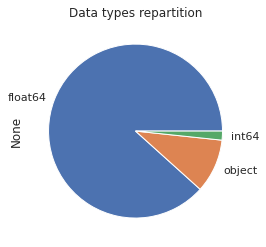

In [7]:
# Just as informations about our data types
sns.set_theme(style="whitegrid")
plt.title('Data types repartition')
full_df.dtypes.value_counts().plot.pie()
print('We can see that most of our data are numerical values')

In [8]:
rename_columns(full_df)

In [9]:
full_df.head()

parcelid  logerror transactiondate  cooling_id  architecture_style_id  \
0  14297519      0.03      2017-01-01         NaN                    NaN   
1  17052889      0.06      2017-01-01         NaN                    NaN   
2  14186244      0.01      2017-01-01         NaN                    NaN   
3  12177905     -0.10      2017-01-01         NaN                    NaN   
4  10887214      0.01      2017-01-01        1.00                    NaN   

   basement_sqft  bathroom_cnt  bedroom_cnt  framing_id  quality_id  \
0            NaN          3.50         4.00         NaN         NaN   
1            NaN          1.00         2.00         NaN         NaN   
2            NaN          2.00         3.00         NaN         NaN   
3            NaN          3.00         4.00         NaN        8.00   
4            NaN          3.00         3.00         NaN        8.00   

   bathroom_cnt_calc  deck_id  floor1_sqft  finished_area_sqft_calc  \
0               3.50      NaN          NaN                  3100.00   
1               1.00      NaN      1465.00                  1465.00   
2               2.00      NaN          NaN                  1243.00   
3               3.00      NaN          NaN                  2376.00   
4               3.00      NaN          NaN                  1312.00   

   finished_area_sqft  perimeter_area  total_area  floor1_sqft_unk  \
0             3100.00             NaN         NaN              NaN   
1             1465.00             NaN         NaN          1465.00   
2             1243.00             NaN         NaN              NaN   
3             2376.00             NaN         NaN              NaN   
4             1312.00             NaN         NaN              NaN   

   base_total_area    fips  fireplace_cnt  bathroom_full_cnt  garage_cnt  \
0              NaN 6059.00            NaN               3.00        2.00   
1              NaN 6111.00           1.00               1.00        1.00   
2              NaN 6059.00            NaN               2.00        2.00   
3              NaN 6037.00            NaN               3.00         NaN   
4              NaN 6037.00            NaN               3.00         NaN   

   garage_sqft spa_flag  heating_id    latitude     longitude  lot_sqft  \
0       633.00      NaN         NaN 33634931.00 -117869207.00   4506.00   
1         0.00      NaN         NaN 34449266.00 -119281531.00  12647.00   
2       440.00      NaN         NaN 33886168.00 -117823170.00   8432.00   
3          NaN      NaN        2.00 34245180.00 -118240722.00  13038.00   
4          NaN      NaN        2.00 34185120.00 -118414640.00 278581.00   

   pool_cnt  pool_total_size  pool_unk_1  pool_unk_2  pool_unk_3  \
0       NaN              NaN         NaN         NaN         NaN   
1       NaN              NaN         NaN         NaN         NaN   
2      1.00              NaN         NaN         NaN        1.00   
3      1.00              NaN         NaN         NaN        1.00   
4      1.00              NaN         NaN         NaN        1.00   

  county_landuse_code  landuse_type_id zoning_description    census_1  \
0                 122           261.00                NaN 60590630.07   
1                1110           261.00                NaN 61110010.02   
2                 122           261.00                NaN 60590218.02   
3                0101           261.00         LCR110000* 60373001.00   
4                010C           266.00               LAR3 60371236.01   

    city_id  county_id  neighborhood_id  region_zip  room_cnt  story_id  \
0  53571.00    1286.00              NaN    96978.00      0.00       NaN   
1  13091.00    2061.00              NaN    97099.00      5.00       NaN   
2  21412.00    1286.00              NaN    97078.00      6.00       NaN   
3 396551.00    3101.00              NaN    96330.00      0.00       NaN   
4  12447.00    3101.00        268548.00    96451.00      0.00       NaN   

   bathroom_small_cnt  construction_id  unit_cnt  patio_sqft  st

Text(0.5, 0, 'percentage')

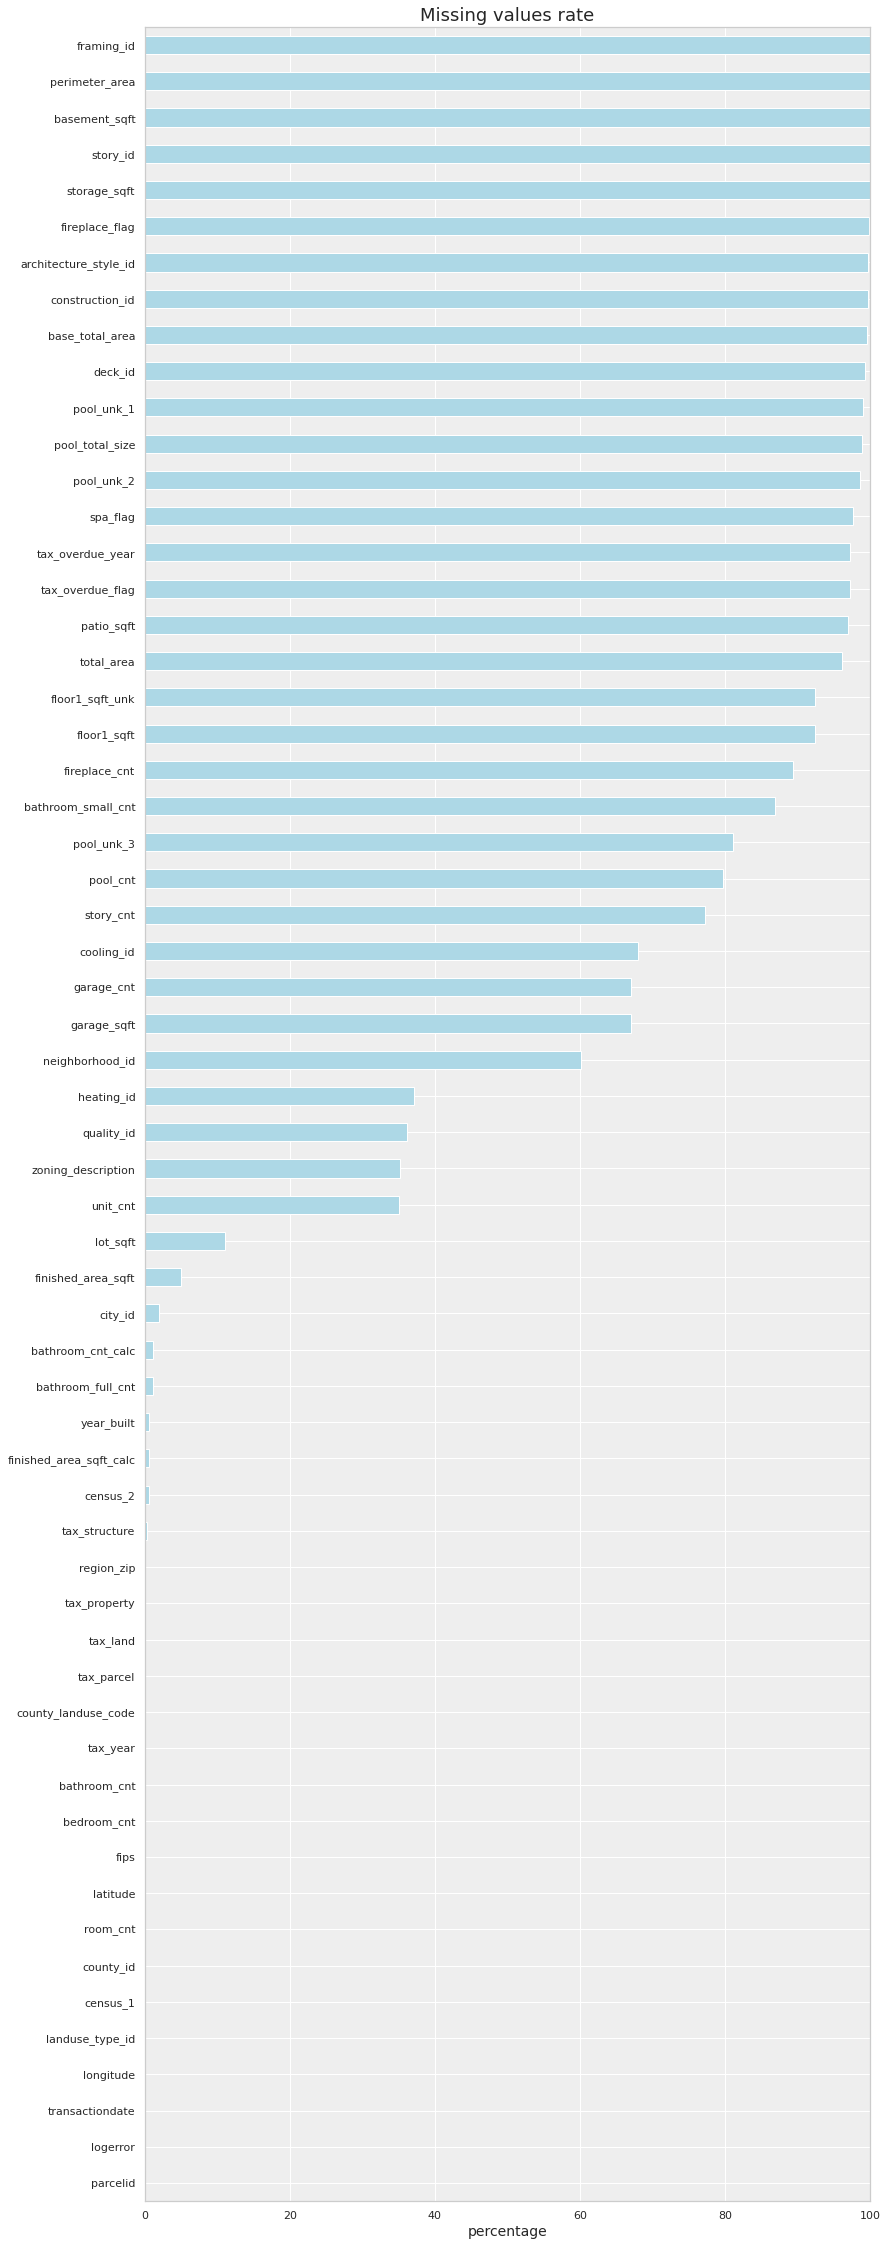

In [11]:
# Visualization of the  missing value per columns
plt.figure(figsize=(13, 40))
plt.rcParams['axes.facecolor'] = '#eee'
plt.rc('grid', color='#fff')
(full_df.isnull().mean(axis=0)*100).sort_values().plot.barh(color ="Lightblue")
plt.xlim(xmax=100)
plt.title("Missing values rate",fontsize=18)
plt.xlabel("percentage",fontsize=14)

In [18]:
full_df.describe()

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-06-08',
       '2017-01-04', '2017-08-04', '2017-01-05', '2017-07-21',
       '2017-01-06', '2017-06-23', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-07-28', '2017-01-10', '2017-06-30',
       '2017-04-19', '2017-06-01', '2017-01-11', '2017-04-21',
       '2017-01-12', '2017-08-23', '2017-01-13', '2017-03-31',
       '2017-01-14', '2017-01-15', '2017-01-16', '2017-01-17',
       '2017-03-01', '2017-06-29', '2017-01-18', '2017-03-17',
       '2017-01-19', '2017-06-16', '2017-01-20', '2017-07-18',
       '2017-01-31', '2017-07-20', '2017-04-27', '2017-06-27',
       '2017-07-14', '2017-05-16', '2017-01-21', '2017-01-22',
       '2017-01-23', '2017-07-27', '2017-01-24', '2017-08-29',
       '2017-01-25', '2017-05-24', '2017-01-26', '2017-01-27',
       '2017-05-19', '2017-09-14', '2017-09-08', '2017-01-28',
       '2017-01-29', '2017-04-25', '2017-01-30', '2017-08-18',
       '2017-04-03', '2017-05-01', '2017-05-18', '2017-